In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

# Massey University: 158222 Data Wrangling & Machine Learning

## ASSESSMENT 3: 


#### Importing and loading relevant libraries

In [2]:
# Importing libraries & hiding warning messages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from pylab import rcParams
import datetime
from dateutil.relativedelta import relativedelta
warnings.filterwarnings('ignore')

# Pandas options
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 20)

rcParams['figure.figsize'] = 12, 6
rcParams['font.size'] = 10

%matplotlib inline

## DATA ACQUISITION

In [3]:
url_energy = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv'
url_codebook = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-codebook.csv'
filename_energy = 'owid-energy-data.csv'
filename_codebook = 'owid-energy-codebook.csv'

_df = pd.read_csv(url_energy)
_df.to_csv(filename_energy, index=False)

codebook_df = pd.read_csv(url_codebook)
codebook_df.to_csv(filename_codebook, index=False)

In [4]:
_df.shape

(21890, 129)

In [5]:
codebook_df = pd.read_csv('owid-energy-codebook.csv', index_col = 'column')
codebook_df.head(10)

,description,source
column,,
country,Geographic location,Our World in Data
year,Year of observation,Our World in Data
iso_code,ISO 3166-1 alpha-3 three-letter country codes,International Organization for Standardization
population,Population,Calculated by Our World in Data based on diffe...
gdp,"Total real gross domestic product, inflation-a...",Maddison Project Database
biofuel_cons_change_pct,Annual percentage change in biofuel consumption,Calculated by Our World in Data based on BP St...
biofuel_cons_change_twh,"Annual change in biofuel consumption, measured...",Calculated by Our World in Data based on BP St...
biofuel_cons_per_capita,Per capita primary energy consumption from bio...,Calculated by Our World in Data based on BP St...
biofuel_consumption,"Primary energy consumption from biofuels, meas...",Calculated by Our World in Data based on BP St...


Extracting Data for countries: USA, Canada, Germany, UK, New Zealand, Australia, China, Japan, India, France, Norway, Italy, Russia, and continents: Europe, N. America, South & Central America, Middle East, Africa, Asia & Pacific, Russia, and World.

In [6]:
countries = ['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'India', 'Japan', 'New Zealand', 'United Kingdom', 'United States']
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'World']

energy_df = _df[(_df['country'].isin(countries)) | (_df['country'].isin(continents))]
energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
122,Africa,1900,NaN,1.388274e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Africa,1901,NaN,1.390979e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Africa,1902,NaN,1.395678e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Africa,1903,NaN,1.400746e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Africa,1904,NaN,1.405955e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21507,World,2017,NaN,7.599822e+09,1.104307e+14,2.702,25.588,127.968,972.534,68.156,517.97,2.070,...,444.54,155.992,1.776,0.753,18.531,459.335,3034.917,149.531,1136.41,399.341,4.541,1.928
21508,World,2018,NaN,7.683790e+09,1.136302e+14,7.545,73.374,136.119,1045.908,71.482,549.25,2.111,...,570.57,198.411,2.193,0.942,11.363,325.102,3360.019,164.670,1265.29,437.287,4.862,2.077
21509,World,2019,NaN,7.764951e+09,NaN,7.098,74.241,144.257,1120.149,74.433,577.97,2.192,...,701.19,238.970,2.659,1.137,11.856,384.496,3744.515,182.812,1419.53,482.233,5.384,2.295
21510,World,2020,NaN,7.840953e+09,NaN,-4.873,-54.584,135.897,1065.565,77.169,605.08,2.303,...,852.10,283.440,3.243,1.419,12.381,448.167,4192.682,202.389,1586.92,534.716,6.040,2.676


In [7]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 122 to 21511
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 2.1+ MB


## EDA

### Demographic Evolution

In [8]:
energy_df['year']

122      1900
123      1901
124      1902
125      1903
126      1904
         ... 
21507    2017
21508    2018
21509    2019
21510    2020
21511    2021
Name: year, Length: 2075, dtype: int64

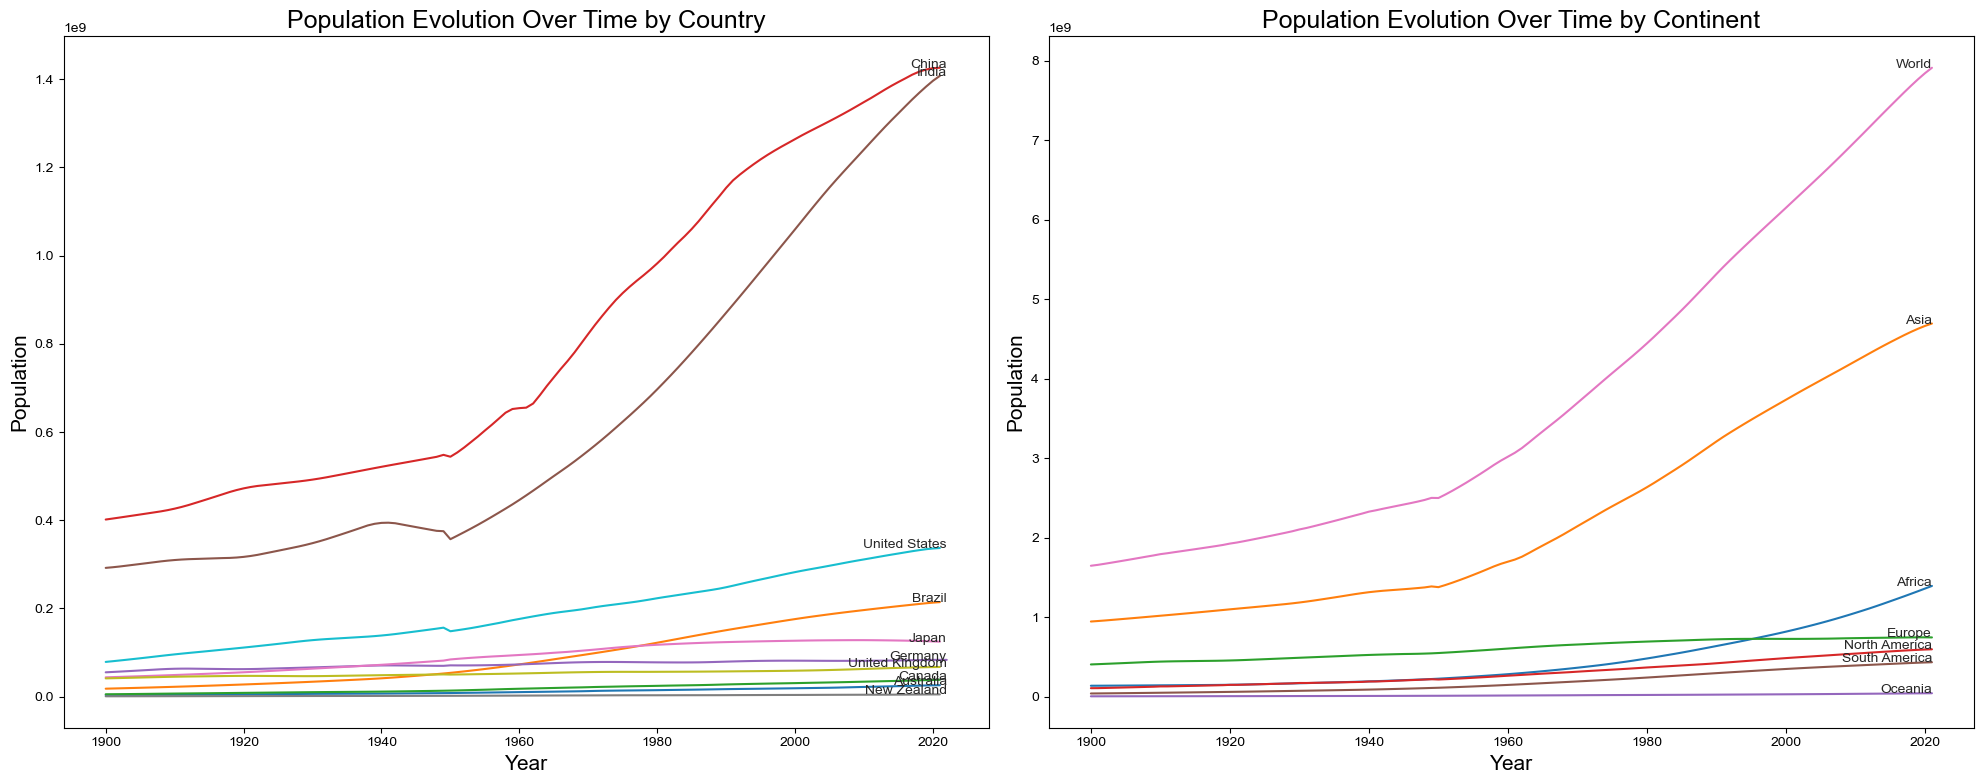

In [9]:
pop_df = energy_df[energy_df['country'].isin(countries)]
pop_continent = energy_df[energy_df['country'].isin(continents)]

# Pivot the dataframe so that each country/continent is a column, the index is the year, and values are the population
pop_df = pop_df.pivot(index='year', columns='country', values='population')
pop_continent = pop_continent.pivot(index='year', columns='country', values='population')

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.set(style="whitegrid")

for country in countries:
    sns.lineplot(data=pop_df, x=pop_df.index, y=country, ax=ax[0])
    y_pos = pop_df[country].dropna().iloc[-1]  # get the last non-NaN value
    ax[0].text(pop_df.index[-1], y_pos, country, fontsize=10, ha='right')

ax[0].set_title('Population Evolution Over Time by Country', fontsize=18)
ax[0].set_xlabel('Year', fontsize=15)
ax[0].set_ylabel('Population', fontsize=15)

for continent in continents:
    sns.lineplot(data=pop_continent, x=pop_continent.index, y=continent, ax=ax[1])
    y_pos = pop_continent[continent].dropna().iloc[-1]
    ax[1].text(pop_continent.index[-1], y_pos, continent, fontsize=10, ha='right')

ax[1].set_title('Population Evolution Over Time by Continent', fontsize=18)
ax[1].set_xlabel('Year', fontsize=15)
ax[1].set_ylabel('Population', fontsize=15)

plt.tight_layout()
plt.show()

### GDP Evolution

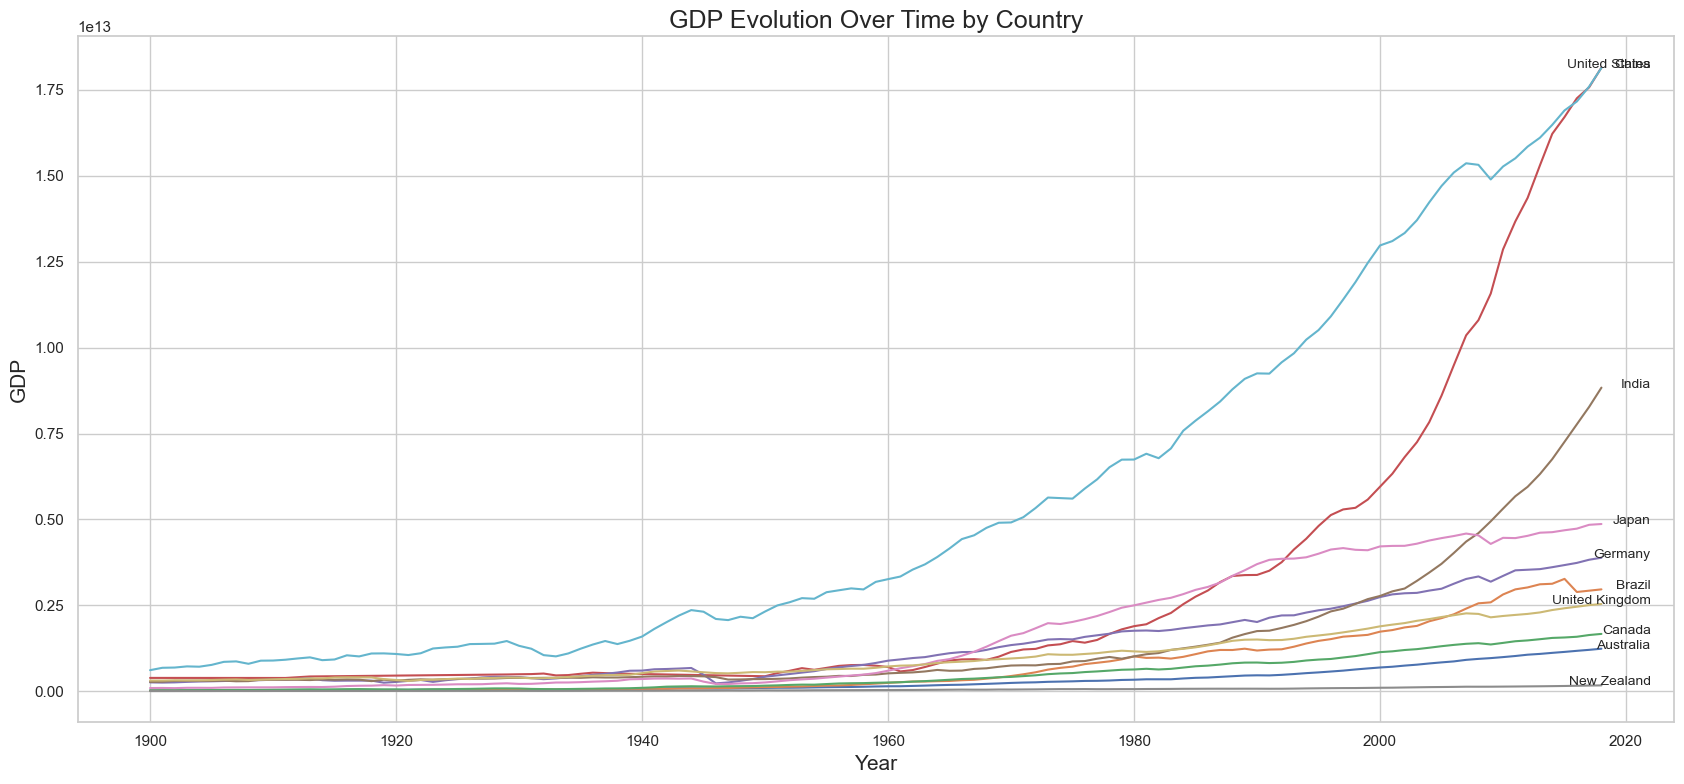

In [10]:
gdp_country = energy_df[energy_df['country'].isin(countries)]

# Pivot the dataframe so that each country is a column, the index is the year, and values are the GDP
gdp_country = gdp_country.pivot(index='year', columns='country', values='gdp')

fig, ax = plt.subplots(figsize=(17, 8))
sns.set(style="whitegrid")

for country in countries:
    sns.lineplot(data=gdp_country, x=gdp_country.index, y=country, ax=ax)
    y_pos = gdp_country[country].dropna().iloc[-1]
    ax.text(gdp_country.index[-1], y_pos, country, fontsize=10, ha='right')

ax.set_title('GDP Evolution Over Time by Country', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('GDP', fontsize=15)
plt.tight_layout()
plt.show()

### Share of Green Energy Source (1965 - 2021)

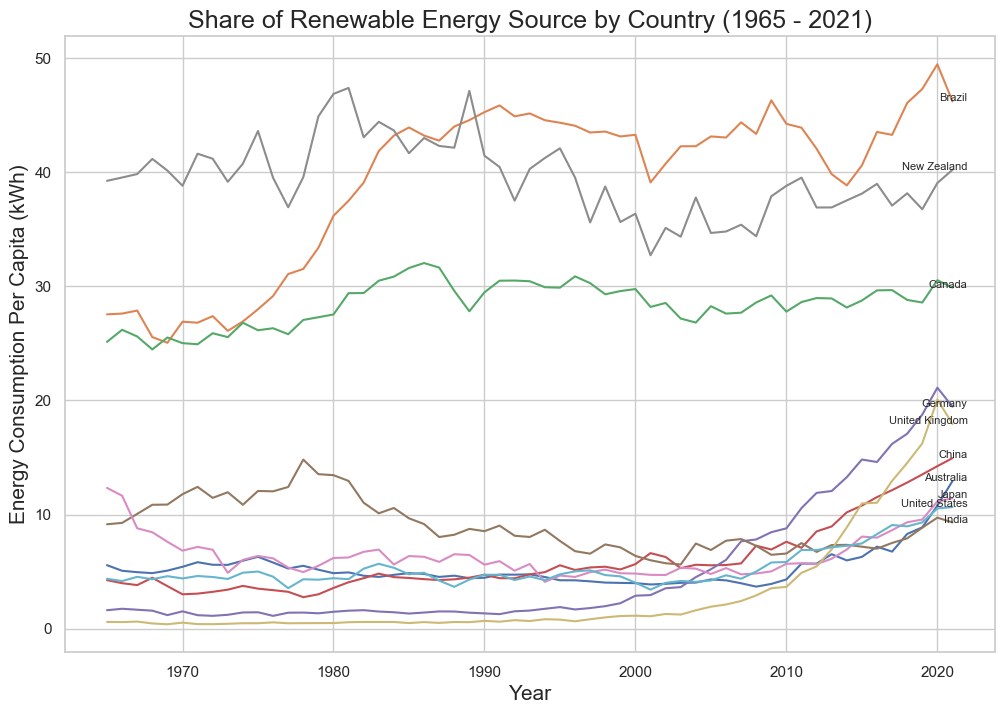

In [11]:
green_df = energy_df[(energy_df['country'].isin(countries)) & (energy_df['year'] >= 1965)]

pivot_df = green_df.pivot(index='year', columns='country', values='renewables_share_energy')

fig, ax = plt.subplots(figsize=(12, 8))

for country in countries:
    sns.lineplot(data=pivot_df, x=pivot_df.index, y=country, ax=ax)
    y_pos = pivot_df[country].dropna().iloc[-1]  # get the last non-NaN value
    ax.text(pivot_df.index[-1], y_pos, country, fontsize=8, ha='right')

ax.set_title('Share of Renewable Energy Source by Country (1965 - 2021)', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Energy Consumption Per Capita (kWh)', fontsize=15)
plt.show()

### 

### Energy Consumption

#### Total World Energy Consumption by Source (1980 - 2021)

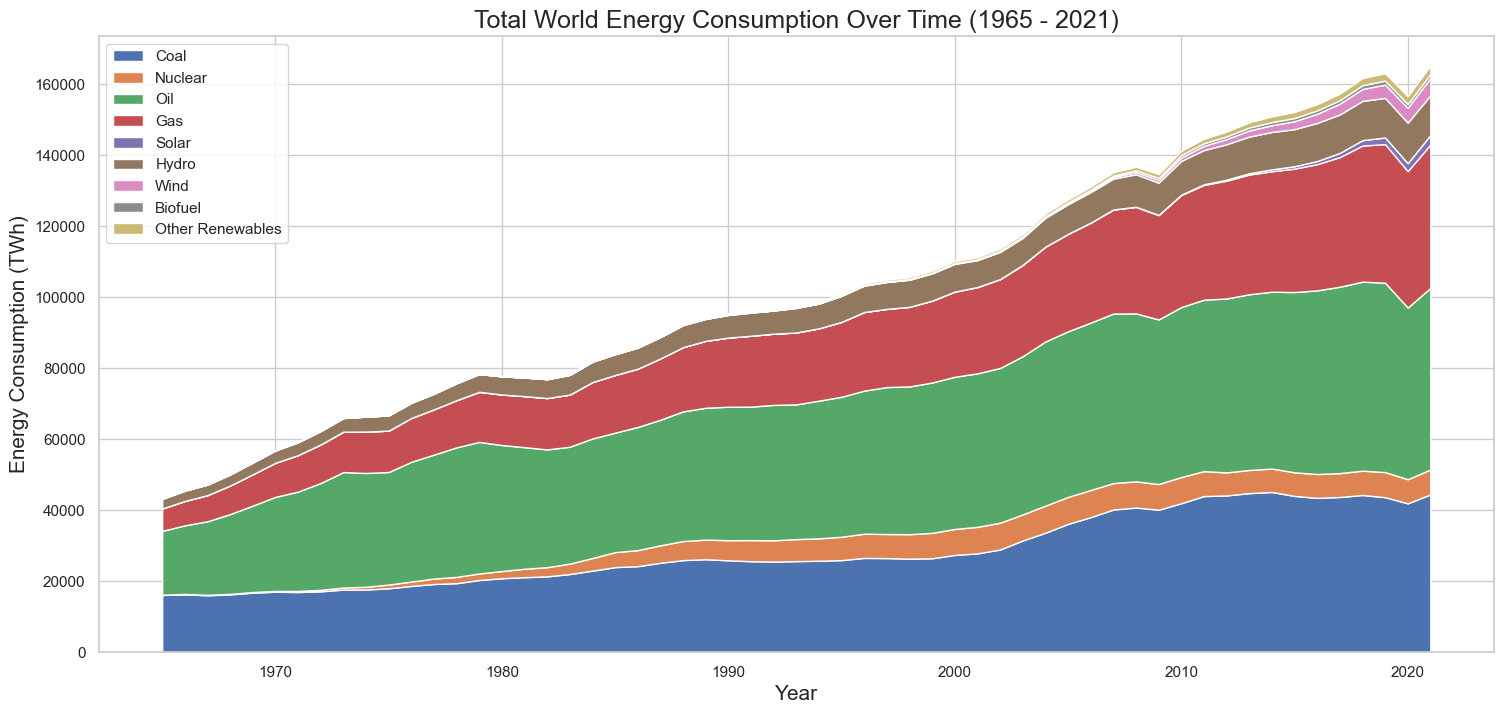

In [12]:
energy_world = energy_df[(energy_df['year'] >= 1965) & (energy_df['country'] == 'World')]

consumption_df = ['coal_consumption', 'nuclear_consumption', 'oil_consumption', 'gas_consumption', 'solar_consumption', 'hydro_consumption', 'wind_consumption', 'biofuel_consumption', 'other_renewable_consumption']
labels = ['Coal', 'Nuclear', 'Oil', 'Gas', 'Solar', 'Hydro', 'Wind', 'Biofuel', 'Other Renewables']

fig, ax = plt.subplots(figsize=(18, 8))
ax.stackplot(energy_world['year'], [energy_world[consumption] for consumption in consumption_df], labels=labels)
ax.set_title('Total World Energy Consumption Over Time (1965 - 2021)', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Energy Consumption (TWh)', fontsize=15)
ax.legend(loc='upper left')
plt.show()


#### World Energy Consumption Over Time Per Capita (1965 - 2021)

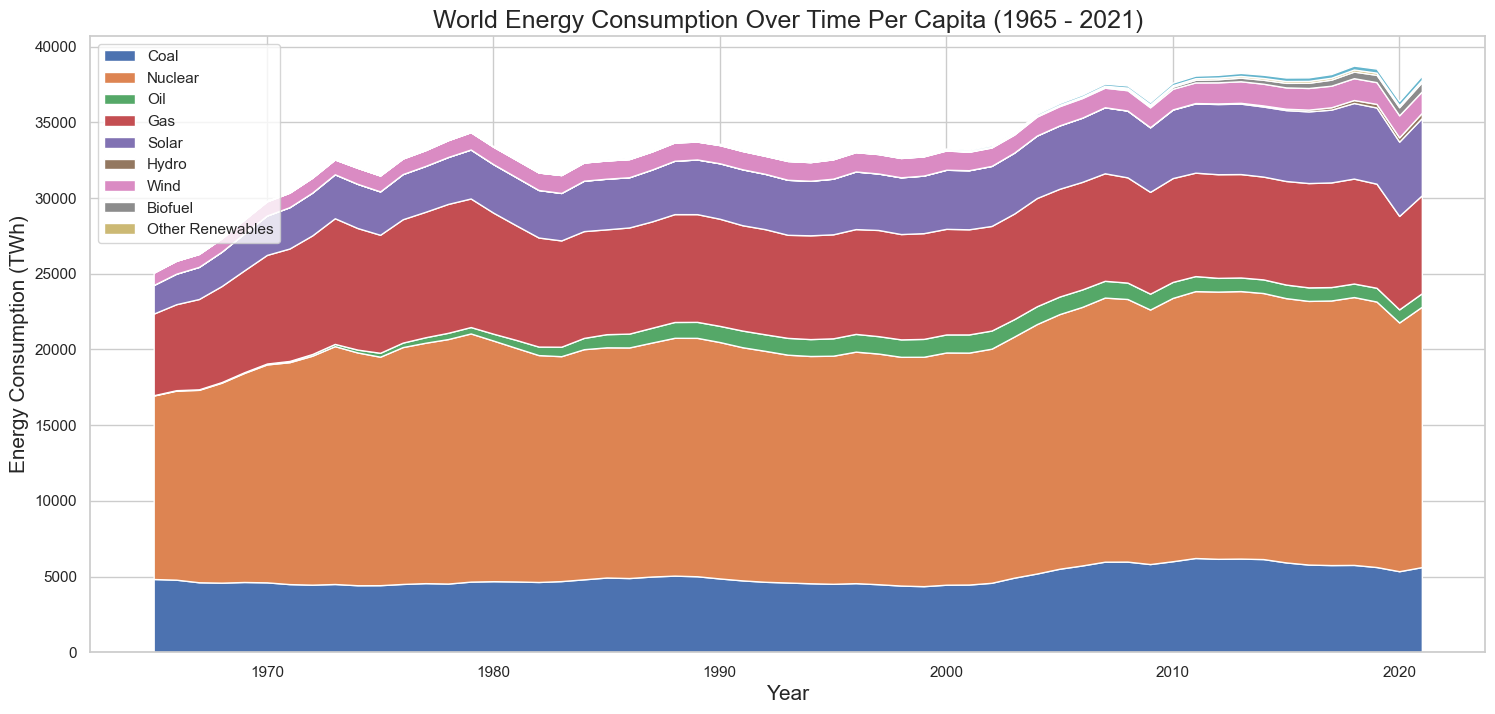

In [13]:
consumption_pc_df = ['coal_cons_per_capita', 'fossil_energy_per_capita', 'nuclear_energy_per_capita', 'oil_energy_per_capita', 'gas_energy_per_capita', 
                     'solar_energy_per_capita', 'hydro_energy_per_capita', 'wind_energy_per_capita', 'biofuel_cons_per_capita', 'other_renewables_energy_per_capita']
fig, ax = plt.subplots(figsize=(18, 8))
ax.stackplot(energy_world['year'], [energy_world[consumption] for consumption in consumption_pc_df], labels=labels)
ax.set_title('World Energy Consumption Over Time Per Capita (1965 - 2021)', fontsize=18)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Energy Consumption (TWh)', fontsize=15)
ax.legend(loc='upper left')
plt.show()

#### Energy Consumption by Country & Source (1965 - 2021)

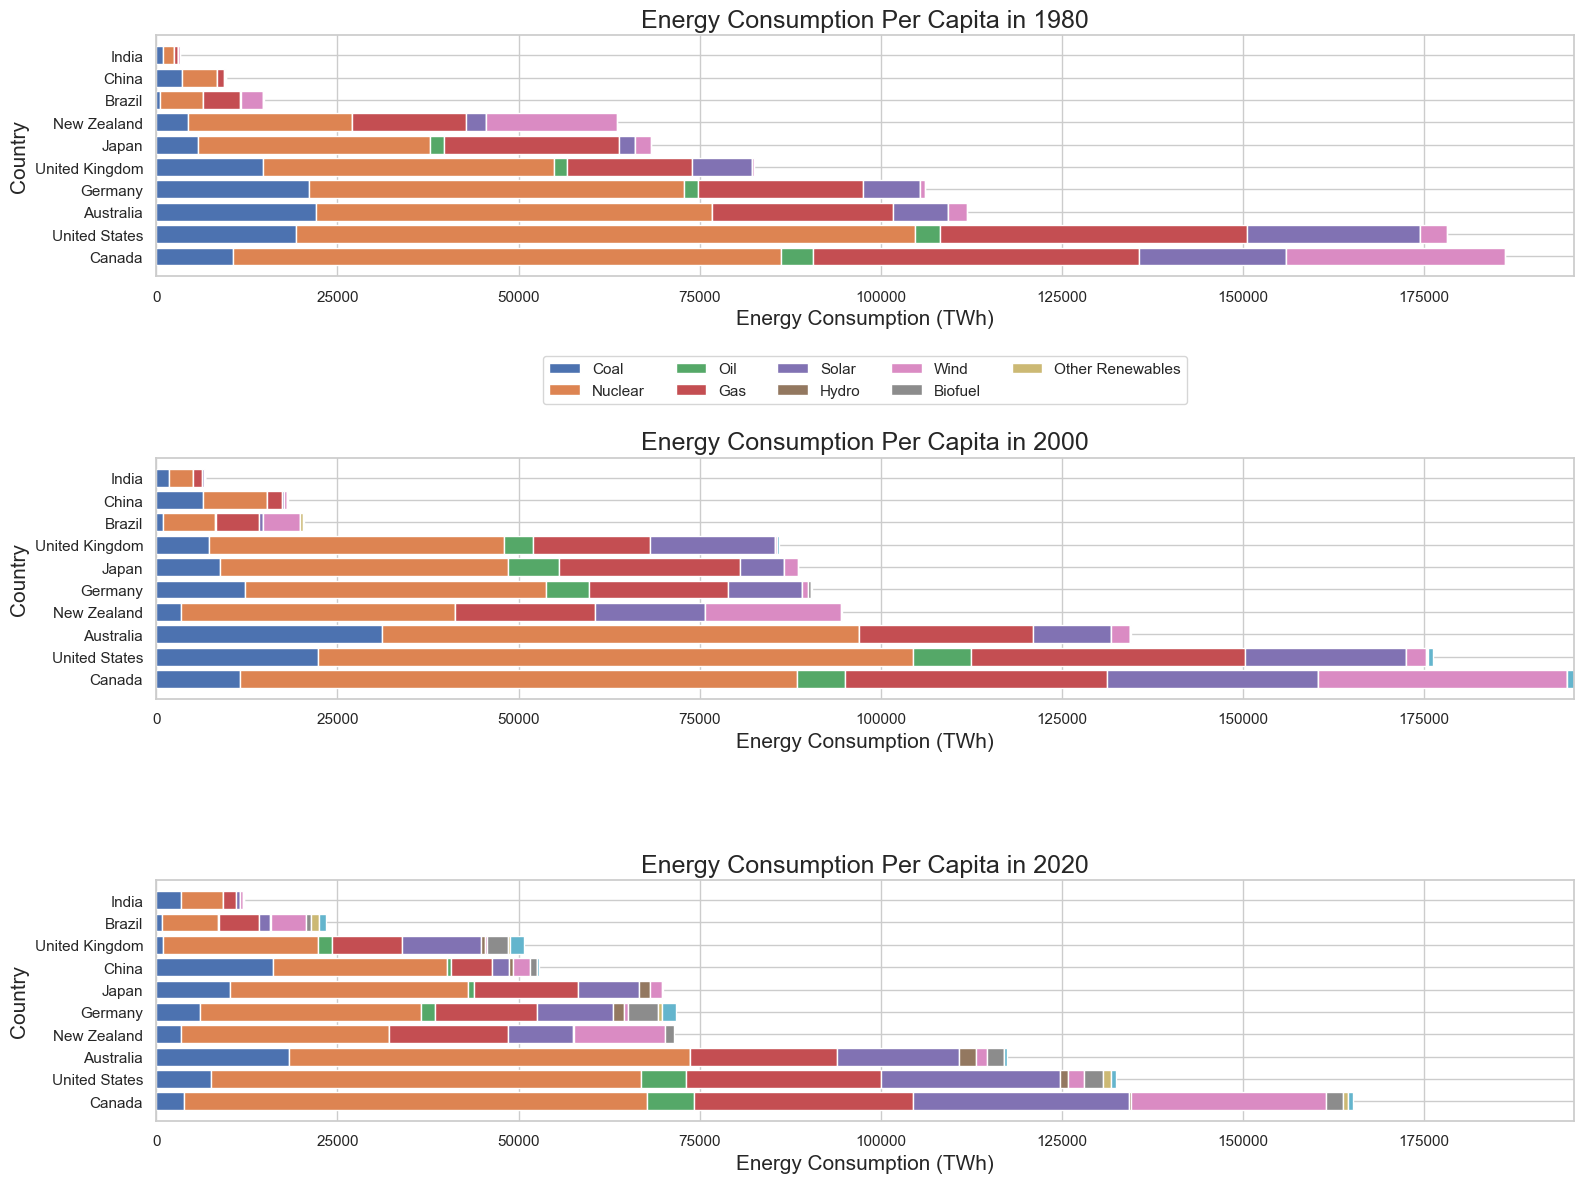

In [14]:
ene_country_pc = energy_df[(energy_df['country'].isin(countries)) & (energy_df['year'].isin([1980, 2000, 2020]))]

fig, axs = plt.subplots(3, 1, figsize=(16, 12))

max_x = ene_country_pc[consumption_pc_df].sum(axis=1).max()  # get the maximum total consumption

for i, year in enumerate([1980, 2000, 2020]):
    year_df = ene_country_pc[ene_country_pc['year'] == year]
    year_df['total_consumption'] = year_df[consumption_pc_df].sum(axis=1)  # calculate the total consumption
    year_df = year_df.sort_values('total_consumption', ascending=False)
    left = np.zeros(len(year_df)) 
    for consumption in consumption_pc_df:
        axs[i].barh(year_df['country'], year_df[consumption], left=left)
        left += year_df[consumption] 
    axs[i].set_title(f'Energy Consumption Per Capita in {year}', fontsize=18)
    axs[i].set_xlabel('Energy Consumption (TWh)', fontsize=15)
    axs[i].set_ylabel('Country', fontsize=15)
    axs[i].set_xlim(0, max_x)  # set the same x-axis scale for all subplots

axs[0].legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=5)
plt.tight_layout()
plt.show()

#### Energy Consumption Per Person by Country  (1965 - 2021)

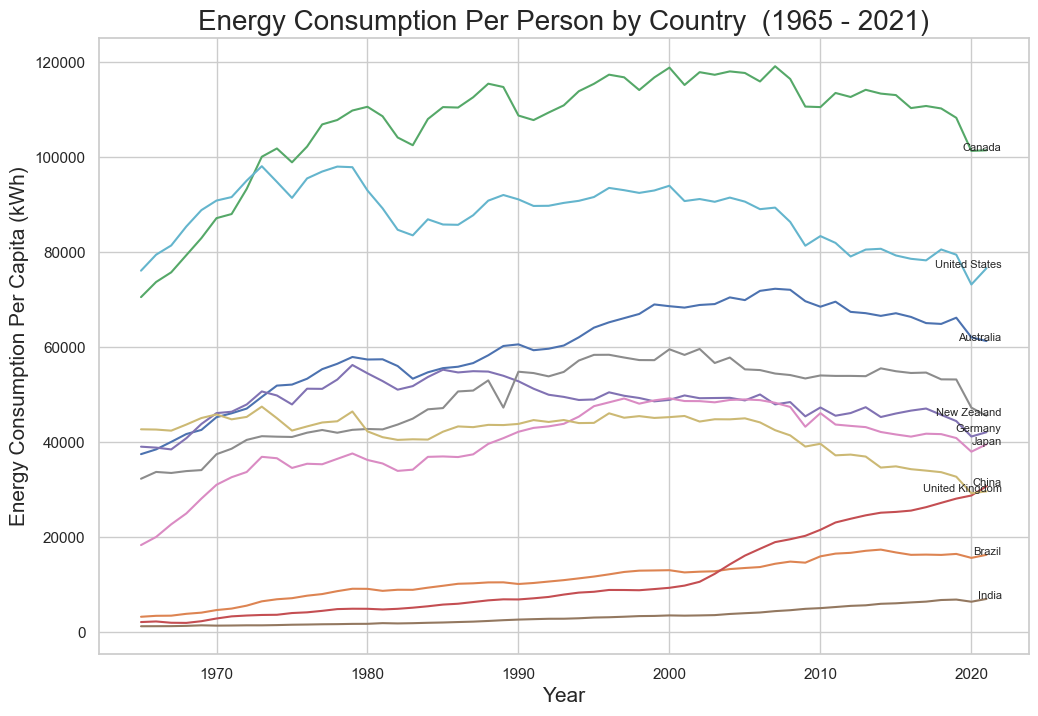

In [15]:
ene_pc_df = energy_df[(energy_df['country'].isin(countries)) & (energy_df['year'] >= 1965)]

pivot_df = ene_pc_df.pivot(index='year', columns='country', values='energy_per_capita')

fig, ax = plt.subplots(figsize=(12, 8))

for country in countries:
    sns.lineplot(data=pivot_df, x=pivot_df.index, y=country, ax=ax)
    y_pos = pivot_df[country].dropna().iloc[-1]  # get the last non-NaN value
    ax.text(pivot_df.index[-1], y_pos, country, fontsize=8, ha='right')

ax.set_title('Energy Consumption Per Person by Country  (1965 - 2021)', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Energy Consumption Per Capita (kWh)', fontsize=15)
plt.show()

### 5.2 Predicting the Share of Renewable Energy for Top 10 Countries (1990-2021 ~ 2035) <a name="classification"></a>

#### Handling missing values

In [20]:
pred_cols = ['country','year', 'iso_code', 'population', 'biofuel_consumption', 'biofuel_share_energy', 'coal_consumption', 'coal_share_energy', 'gas_consumption', 'gas_share_energy','hydro_consumption', 'hydro_share_energy', 'nuclear_consumption','nuclear_share_energy', 'oil_consumption', 'oil_share_energy', 'other_renewable_consumption', 'other_renewables_share_energy', 'primary_energy_consumption', 'renewables_consumption', 'renewables_share_energy', 'solar_consumption', 'solar_share_energy', 'wind_consumption', 'wind_share_energy']

missing_val = green_df[(green_df['country'].isin(countries)) &
                       (green_df['year'] >= 1990) &
                       (green_df['year'] <= 2021) &
                       (green_df['iso_code'].notnull())][pred_cols].isnull().sum()
missing_val

country                           0
year                              0
iso_code                          0
population                        0
biofuel_consumption              64
biofuel_share_energy             64
coal_consumption                  0
coal_share_energy                 0
gas_consumption                   0
gas_share_energy                  0
hydro_consumption                 0
hydro_share_energy                0
nuclear_consumption               2
nuclear_share_energy              2
oil_consumption                   0
oil_share_energy                  0
other_renewable_consumption       0
other_renewables_share_energy     0
primary_energy_consumption        0
renewables_consumption            0
renewables_share_energy           0
solar_consumption                 0
solar_share_energy                0
wind_consumption                  0
wind_share_energy                 0
dtype: int64

In [21]:
green_pred = green_df.copy()

# replacing missing values with zero (same as other years)
green_pred.loc[(green_pred['country'].isin(countries)) &
                  (green_pred['year'] >= 1990) &
                  (green_pred['year'] <= 2021) &
                  (green_pred['iso_code'].notnull()), pred_cols] = green_pred[(green_pred['country'].isin(countries)) &
                                                                                   (green_pred['year'] >= 1990) &
                                                                                   (green_pred['year'] <= 2021) &
                                                                                   (green_pred['iso_code'].notnull())][pred_cols].fillna(0)

### LSTM Model

##### LSTM (plus retrain full data for preds)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(111)

predictions_dict = {}
mse_dict = {}
mae_dict = {}

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

for country in countries:
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]
    lstm_model = data_country['renewables_share_energy'].values.astype('float32').reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    lstm_model = scaler.fit_transform(lstm_model)

    # Split and format the data
    train_size = int(len(lstm_model) * 0.8)
    train, test = lstm_model[0:train_size, :], lstm_model[train_size:, :]
    trainX, trainY = create_dataset(train)
    testX, testY = create_dataset(test)
    trainX, testX = trainX.reshape(-1, 1, 1), testX.reshape(-1, 1, 1)

    # Define and train the model
    lstm = Sequential([LSTM(5, input_shape=(1, 1)), Dense(1)])
    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

    # Evaluate the model
    trainPredict = lstm.predict(trainX)
    testPredict = lstm.predict(testX)
    trainPredict, testPredict = scaler.inverse_transform(trainPredict), scaler.inverse_transform(testPredict)
    mse_dict[country] = mean_squared_error(scaler.inverse_transform(testY.reshape(-1, 1)), testPredict)
    mae_dict[country] = mean_absolute_error(scaler.inverse_transform(testY.reshape(-1, 1)), testPredict)

    # Retrain the model on the full data
    fullX, fullY = create_dataset(lstm_model)
    fullX = fullX.reshape(-1, 1, 1)
    lstm.fit(fullX, fullY, epochs=100, batch_size=1, verbose=2)

    # Generate future predictions
    futurePredict = list()
    current_step = lstm_model[-1, :] 
    for _ in range(15):
        current_step = current_step.reshape(1, 1, 1)
        next_step = lstm.predict(current_step) 
        futurePredict.append(next_step[0])  
        current_step = np.array(next_step) 
    predictions_dict[country] = {'future_predict': scaler.inverse_transform(futurePredict)}


Epoch 1/100
24/24 - 2s - loss: 0.0125 - 2s/epoch - 66ms/step
Epoch 2/100
24/24 - 0s - loss: 0.0090 - 57ms/epoch - 2ms/step
Epoch 3/100
24/24 - 0s - loss: 0.0072 - 43ms/epoch - 2ms/step
Epoch 4/100
24/24 - 0s - loss: 0.0067 - 46ms/epoch - 2ms/step
Epoch 5/100
24/24 - 0s - loss: 0.0063 - 46ms/epoch - 2ms/step
Epoch 6/100
24/24 - 0s - loss: 0.0063 - 48ms/epoch - 2ms/step
Epoch 7/100
24/24 - 0s - loss: 0.0061 - 64ms/epoch - 3ms/step
Epoch 8/100
24/24 - 0s - loss: 0.0061 - 72ms/epoch - 3ms/step
Epoch 9/100
24/24 - 0s - loss: 0.0059 - 54ms/epoch - 2ms/step
Epoch 10/100
24/24 - 0s - loss: 0.0059 - 47ms/epoch - 2ms/step
Epoch 11/100
24/24 - 0s - loss: 0.0059 - 54ms/epoch - 2ms/step
Epoch 12/100
24/24 - 0s - loss: 0.0057 - 47ms/epoch - 2ms/step
Epoch 13/100
24/24 - 0s - loss: 0.0056 - 48ms/epoch - 2ms/step
Epoch 14/100
24/24 - 0s - loss: 0.0055 - 49ms/epoch - 2ms/step
Epoch 15/100
24/24 - 0s - loss: 0.0054 - 50ms/epoch - 2ms/step
Epoch 16/100
24/24 - 0s - loss: 0.0053 - 47ms/epoch - 2ms/step
Ep

Epoch 30/100
31/31 - 0s - loss: 0.0031 - 50ms/epoch - 2ms/step
Epoch 31/100
31/31 - 0s - loss: 0.0030 - 49ms/epoch - 2ms/step
Epoch 32/100
31/31 - 0s - loss: 0.0029 - 50ms/epoch - 2ms/step
Epoch 33/100
31/31 - 0s - loss: 0.0029 - 48ms/epoch - 2ms/step
Epoch 34/100
31/31 - 0s - loss: 0.0030 - 46ms/epoch - 1ms/step
Epoch 35/100
31/31 - 0s - loss: 0.0029 - 51ms/epoch - 2ms/step
Epoch 36/100
31/31 - 0s - loss: 0.0029 - 51ms/epoch - 2ms/step
Epoch 37/100
31/31 - 0s - loss: 0.0030 - 49ms/epoch - 2ms/step
Epoch 38/100
31/31 - 0s - loss: 0.0029 - 47ms/epoch - 2ms/step
Epoch 39/100
31/31 - 0s - loss: 0.0029 - 47ms/epoch - 2ms/step
Epoch 40/100
31/31 - 0s - loss: 0.0029 - 44ms/epoch - 1ms/step
Epoch 41/100
31/31 - 0s - loss: 0.0029 - 48ms/epoch - 2ms/step
Epoch 42/100
31/31 - 0s - loss: 0.0031 - 47ms/epoch - 2ms/step
Epoch 43/100
31/31 - 0s - loss: 0.0032 - 49ms/epoch - 2ms/step
Epoch 44/100
31/31 - 0s - loss: 0.0029 - 49ms/epoch - 2ms/step
Epoch 45/100
31/31 - 0s - loss: 0.0029 - 46ms/epoch - 1

Epoch 48/100
24/24 - 0s - loss: 0.0202 - 38ms/epoch - 2ms/step
Epoch 49/100
24/24 - 0s - loss: 0.0197 - 44ms/epoch - 2ms/step
Epoch 50/100
24/24 - 0s - loss: 0.0198 - 37ms/epoch - 2ms/step
Epoch 51/100
24/24 - 0s - loss: 0.0198 - 40ms/epoch - 2ms/step
Epoch 52/100
24/24 - 0s - loss: 0.0195 - 36ms/epoch - 1ms/step
Epoch 53/100
24/24 - 0s - loss: 0.0198 - 36ms/epoch - 1ms/step
Epoch 54/100
24/24 - 0s - loss: 0.0197 - 42ms/epoch - 2ms/step
Epoch 55/100
24/24 - 0s - loss: 0.0194 - 38ms/epoch - 2ms/step
Epoch 56/100
24/24 - 0s - loss: 0.0193 - 40ms/epoch - 2ms/step
Epoch 57/100
24/24 - 0s - loss: 0.0191 - 40ms/epoch - 2ms/step
Epoch 58/100
24/24 - 0s - loss: 0.0192 - 39ms/epoch - 2ms/step
Epoch 59/100
24/24 - 0s - loss: 0.0194 - 38ms/epoch - 2ms/step
Epoch 60/100
24/24 - 0s - loss: 0.0189 - 34ms/epoch - 1ms/step
Epoch 61/100
24/24 - 0s - loss: 0.0190 - 40ms/epoch - 2ms/step
Epoch 62/100
24/24 - 0s - loss: 0.0188 - 38ms/epoch - 2ms/step
Epoch 63/100
24/24 - 0s - loss: 0.0190 - 38ms/epoch - 2

Epoch 77/100
31/31 - 0s - loss: 0.0219 - 49ms/epoch - 2ms/step
Epoch 78/100
31/31 - 0s - loss: 0.0222 - 43ms/epoch - 1ms/step
Epoch 79/100
31/31 - 0s - loss: 0.0220 - 42ms/epoch - 1ms/step
Epoch 80/100
31/31 - 0s - loss: 0.0219 - 43ms/epoch - 1ms/step
Epoch 81/100
31/31 - 0s - loss: 0.0219 - 41ms/epoch - 1ms/step
Epoch 82/100
31/31 - 0s - loss: 0.0220 - 40ms/epoch - 1ms/step
Epoch 83/100
31/31 - 0s - loss: 0.0218 - 44ms/epoch - 1ms/step
Epoch 84/100
31/31 - 0s - loss: 0.0220 - 45ms/epoch - 1ms/step
Epoch 85/100
31/31 - 0s - loss: 0.0221 - 46ms/epoch - 1ms/step
Epoch 86/100
31/31 - 0s - loss: 0.0226 - 47ms/epoch - 2ms/step
Epoch 87/100
31/31 - 0s - loss: 0.0220 - 45ms/epoch - 1ms/step
Epoch 88/100
31/31 - 0s - loss: 0.0220 - 42ms/epoch - 1ms/step
Epoch 89/100
31/31 - 0s - loss: 0.0224 - 40ms/epoch - 1ms/step
Epoch 90/100
31/31 - 0s - loss: 0.0220 - 39ms/epoch - 1ms/step
Epoch 91/100
31/31 - 0s - loss: 0.0221 - 41ms/epoch - 1ms/step
Epoch 92/100
31/31 - 0s - loss: 0.0221 - 40ms/epoch - 1

Epoch 95/100
24/24 - 0s - loss: 0.0357 - 32ms/epoch - 1ms/step
Epoch 96/100
24/24 - 0s - loss: 0.0358 - 33ms/epoch - 1ms/step
Epoch 97/100
24/24 - 0s - loss: 0.0357 - 33ms/epoch - 1ms/step
Epoch 98/100
24/24 - 0s - loss: 0.0361 - 34ms/epoch - 1ms/step
Epoch 99/100
24/24 - 0s - loss: 0.0357 - 36ms/epoch - 2ms/step
Epoch 100/100
24/24 - 0s - loss: 0.0354 - 35ms/epoch - 1ms/step
1/1 [==============================] - 0s 15ms/step
Epoch 1/100
31/31 - 0s - loss: 0.0366 - 38ms/epoch - 1ms/step
Epoch 2/100
31/31 - 0s - loss: 0.0363 - 41ms/epoch - 1ms/step
Epoch 3/100
31/31 - 0s - loss: 0.0363 - 41ms/epoch - 1ms/step
Epoch 4/100
31/31 - 0s - loss: 0.0374 - 44ms/epoch - 1ms/step
Epoch 5/100
31/31 - 0s - loss: 0.0362 - 44ms/epoch - 1ms/step
Epoch 6/100
31/31 - 0s - loss: 0.0362 - 44ms/epoch - 1ms/step
Epoch 7/100
31/31 - 0s - loss: 0.0362 - 44ms/epoch - 1ms/step
Epoch 8/100
31/31 - 0s - loss: 0.0366 - 45ms/epoch - 1ms/step
Epoch 9/100
31/31 - 0s - loss: 0.0361 - 44ms/epoch - 1ms/step
Epoch 10/10

Epoch 12/100
24/24 - 0s - loss: 0.0140 - 33ms/epoch - 1ms/step
Epoch 13/100
24/24 - 0s - loss: 0.0139 - 33ms/epoch - 1ms/step
Epoch 14/100
24/24 - 0s - loss: 0.0136 - 33ms/epoch - 1ms/step
Epoch 15/100
24/24 - 0s - loss: 0.0133 - 31ms/epoch - 1ms/step
Epoch 16/100
24/24 - 0s - loss: 0.0132 - 31ms/epoch - 1ms/step
Epoch 17/100
24/24 - 0s - loss: 0.0130 - 33ms/epoch - 1ms/step
Epoch 18/100
24/24 - 0s - loss: 0.0128 - 33ms/epoch - 1ms/step
Epoch 19/100
24/24 - 0s - loss: 0.0126 - 31ms/epoch - 1ms/step
Epoch 20/100
24/24 - 0s - loss: 0.0125 - 35ms/epoch - 1ms/step
Epoch 21/100
24/24 - 0s - loss: 0.0124 - 34ms/epoch - 1ms/step
Epoch 22/100
24/24 - 0s - loss: 0.0121 - 30ms/epoch - 1ms/step
Epoch 23/100
24/24 - 0s - loss: 0.0119 - 31ms/epoch - 1ms/step
Epoch 24/100
24/24 - 0s - loss: 0.0116 - 31ms/epoch - 1ms/step
Epoch 25/100
24/24 - 0s - loss: 0.0114 - 32ms/epoch - 1ms/step
Epoch 26/100
24/24 - 0s - loss: 0.0112 - 33ms/epoch - 1ms/step
Epoch 27/100
24/24 - 0s - loss: 0.0111 - 32ms/epoch - 1

Epoch 41/100
31/31 - 0s - loss: 0.0026 - 45ms/epoch - 1ms/step
Epoch 42/100
31/31 - 0s - loss: 0.0026 - 44ms/epoch - 1ms/step
Epoch 43/100
31/31 - 0s - loss: 0.0026 - 45ms/epoch - 1ms/step
Epoch 44/100
31/31 - 0s - loss: 0.0027 - 46ms/epoch - 1ms/step
Epoch 45/100
31/31 - 0s - loss: 0.0027 - 44ms/epoch - 1ms/step
Epoch 46/100
31/31 - 0s - loss: 0.0026 - 44ms/epoch - 1ms/step
Epoch 47/100
31/31 - 0s - loss: 0.0027 - 45ms/epoch - 1ms/step
Epoch 48/100
31/31 - 0s - loss: 0.0026 - 45ms/epoch - 1ms/step
Epoch 49/100
31/31 - 0s - loss: 0.0026 - 43ms/epoch - 1ms/step
Epoch 50/100
31/31 - 0s - loss: 0.0026 - 44ms/epoch - 1ms/step
Epoch 51/100
31/31 - 0s - loss: 0.0027 - 47ms/epoch - 2ms/step
Epoch 52/100
31/31 - 0s - loss: 0.0026 - 46ms/epoch - 1ms/step
Epoch 53/100
31/31 - 0s - loss: 0.0026 - 44ms/epoch - 1ms/step
Epoch 54/100
31/31 - 0s - loss: 0.0027 - 44ms/epoch - 1ms/step
Epoch 55/100
31/31 - 0s - loss: 0.0027 - 43ms/epoch - 1ms/step
Epoch 56/100
31/31 - 0s - loss: 0.0026 - 45ms/epoch - 1

Epoch 59/100
24/24 - 0s - loss: 0.0022 - 36ms/epoch - 1ms/step
Epoch 60/100
24/24 - 0s - loss: 0.0020 - 35ms/epoch - 1ms/step
Epoch 61/100
24/24 - 0s - loss: 0.0018 - 34ms/epoch - 1ms/step
Epoch 62/100
24/24 - 0s - loss: 0.0016 - 47ms/epoch - 2ms/step
Epoch 63/100
24/24 - 0s - loss: 0.0015 - 37ms/epoch - 2ms/step
Epoch 64/100
24/24 - 0s - loss: 0.0014 - 36ms/epoch - 2ms/step
Epoch 65/100
24/24 - 0s - loss: 0.0013 - 34ms/epoch - 1ms/step
Epoch 66/100
24/24 - 0s - loss: 0.0012 - 33ms/epoch - 1ms/step
Epoch 67/100
24/24 - 0s - loss: 0.0011 - 36ms/epoch - 1ms/step
Epoch 68/100
24/24 - 0s - loss: 0.0010 - 36ms/epoch - 1ms/step
Epoch 69/100
24/24 - 0s - loss: 9.5876e-04 - 37ms/epoch - 2ms/step
Epoch 70/100
24/24 - 0s - loss: 9.0634e-04 - 33ms/epoch - 1ms/step
Epoch 71/100
24/24 - 0s - loss: 8.6491e-04 - 36ms/epoch - 1ms/step
Epoch 72/100
24/24 - 0s - loss: 8.4928e-04 - 37ms/epoch - 2ms/step
Epoch 73/100
24/24 - 0s - loss: 8.1069e-04 - 35ms/epoch - 1ms/step
Epoch 74/100
24/24 - 0s - loss: 7.9

Epoch 86/100
31/31 - 0s - loss: 0.0016 - 46ms/epoch - 1ms/step
Epoch 87/100
31/31 - 0s - loss: 0.0015 - 41ms/epoch - 1ms/step
Epoch 88/100
31/31 - 0s - loss: 0.0014 - 44ms/epoch - 1ms/step
Epoch 89/100
31/31 - 0s - loss: 0.0014 - 46ms/epoch - 1ms/step
Epoch 90/100
31/31 - 0s - loss: 0.0014 - 43ms/epoch - 1ms/step
Epoch 91/100
31/31 - 0s - loss: 0.0014 - 40ms/epoch - 1ms/step
Epoch 92/100
31/31 - 0s - loss: 0.0015 - 46ms/epoch - 1ms/step
Epoch 93/100
31/31 - 0s - loss: 0.0014 - 44ms/epoch - 1ms/step
Epoch 94/100
31/31 - 0s - loss: 0.0014 - 41ms/epoch - 1ms/step
Epoch 95/100
31/31 - 0s - loss: 0.0014 - 44ms/epoch - 1ms/step
Epoch 96/100
31/31 - 0s - loss: 0.0014 - 45ms/epoch - 1ms/step
Epoch 97/100
31/31 - 0s - loss: 0.0015 - 43ms/epoch - 1ms/step
Epoch 98/100
31/31 - 0s - loss: 0.0014 - 42ms/epoch - 1ms/step
Epoch 99/100
31/31 - 0s - loss: 0.0014 - 47ms/epoch - 2ms/step
Epoch 100/100
31/31 - 0s - loss: 0.0014 - 43ms/epoch - 1ms/step
1/1 [==============================] - 0s 15ms/step
Ep

31/31 - 0s - loss: 0.0265 - 40ms/epoch - 1ms/step
Epoch 3/100
31/31 - 0s - loss: 0.0262 - 43ms/epoch - 1ms/step
Epoch 4/100
31/31 - 0s - loss: 0.0257 - 41ms/epoch - 1ms/step
Epoch 5/100
31/31 - 0s - loss: 0.0264 - 44ms/epoch - 1ms/step
Epoch 6/100
31/31 - 0s - loss: 0.0256 - 48ms/epoch - 2ms/step
Epoch 7/100
31/31 - 0s - loss: 0.0262 - 43ms/epoch - 1ms/step
Epoch 8/100
31/31 - 0s - loss: 0.0253 - 44ms/epoch - 1ms/step
Epoch 9/100
31/31 - 0s - loss: 0.0258 - 43ms/epoch - 1ms/step
Epoch 10/100
31/31 - 0s - loss: 0.0256 - 46ms/epoch - 1ms/step
Epoch 11/100
31/31 - 0s - loss: 0.0252 - 43ms/epoch - 1ms/step
Epoch 12/100
31/31 - 0s - loss: 0.0253 - 42ms/epoch - 1ms/step
Epoch 13/100
31/31 - 0s - loss: 0.0255 - 48ms/epoch - 2ms/step
Epoch 14/100
31/31 - 0s - loss: 0.0254 - 45ms/epoch - 1ms/step
Epoch 15/100
31/31 - 0s - loss: 0.0251 - 45ms/epoch - 1ms/step
Epoch 16/100
31/31 - 0s - loss: 0.0251 - 45ms/epoch - 1ms/step
Epoch 17/100
31/31 - 0s - loss: 0.0250 - 44ms/epoch - 1ms/step
Epoch 18/100

24/24 - 0s - loss: 0.0067 - 33ms/epoch - 1ms/step
Epoch 21/100
24/24 - 0s - loss: 0.0067 - 32ms/epoch - 1ms/step
Epoch 22/100
24/24 - 0s - loss: 0.0067 - 33ms/epoch - 1ms/step
Epoch 23/100
24/24 - 0s - loss: 0.0067 - 33ms/epoch - 1ms/step
Epoch 24/100
24/24 - 0s - loss: 0.0068 - 33ms/epoch - 1ms/step
Epoch 25/100
24/24 - 0s - loss: 0.0066 - 33ms/epoch - 1ms/step
Epoch 26/100
24/24 - 0s - loss: 0.0068 - 34ms/epoch - 1ms/step
Epoch 27/100
24/24 - 0s - loss: 0.0066 - 36ms/epoch - 1ms/step
Epoch 28/100
24/24 - 0s - loss: 0.0066 - 33ms/epoch - 1ms/step
Epoch 29/100
24/24 - 0s - loss: 0.0066 - 34ms/epoch - 1ms/step
Epoch 30/100
24/24 - 0s - loss: 0.0066 - 35ms/epoch - 1ms/step
Epoch 31/100
24/24 - 0s - loss: 0.0065 - 33ms/epoch - 1ms/step
Epoch 32/100
24/24 - 0s - loss: 0.0065 - 33ms/epoch - 1ms/step
Epoch 33/100
24/24 - 0s - loss: 0.0065 - 34ms/epoch - 1ms/step
Epoch 34/100
24/24 - 0s - loss: 0.0065 - 34ms/epoch - 1ms/step
Epoch 35/100
24/24 - 0s - loss: 0.0064 - 34ms/epoch - 1ms/step
Epoch

Epoch 49/100
31/31 - 0s - loss: 0.0057 - 44ms/epoch - 1ms/step
Epoch 50/100
31/31 - 0s - loss: 0.0059 - 43ms/epoch - 1ms/step
Epoch 51/100
31/31 - 0s - loss: 0.0058 - 45ms/epoch - 1ms/step
Epoch 52/100
31/31 - 0s - loss: 0.0056 - 41ms/epoch - 1ms/step
Epoch 53/100
31/31 - 0s - loss: 0.0057 - 44ms/epoch - 1ms/step
Epoch 54/100
31/31 - 0s - loss: 0.0061 - 43ms/epoch - 1ms/step
Epoch 55/100
31/31 - 0s - loss: 0.0056 - 44ms/epoch - 1ms/step
Epoch 56/100
31/31 - 0s - loss: 0.0057 - 46ms/epoch - 1ms/step
Epoch 57/100
31/31 - 0s - loss: 0.0058 - 43ms/epoch - 1ms/step
Epoch 58/100
31/31 - 0s - loss: 0.0058 - 42ms/epoch - 1ms/step
Epoch 59/100
31/31 - 0s - loss: 0.0057 - 40ms/epoch - 1ms/step
Epoch 60/100
31/31 - 0s - loss: 0.0057 - 41ms/epoch - 1ms/step
Epoch 61/100
31/31 - 0s - loss: 0.0057 - 42ms/epoch - 1ms/step
Epoch 62/100
31/31 - 0s - loss: 0.0056 - 39ms/epoch - 1ms/step
Epoch 63/100
31/31 - 0s - loss: 0.0056 - 43ms/epoch - 1ms/step
Epoch 64/100
31/31 - 0s - loss: 0.0057 - 41ms/epoch - 1

Epoch 67/100
24/24 - 0s - loss: 0.0446 - 34ms/epoch - 1ms/step
Epoch 68/100
24/24 - 0s - loss: 0.0450 - 36ms/epoch - 2ms/step
Epoch 69/100
24/24 - 0s - loss: 0.0453 - 33ms/epoch - 1ms/step
Epoch 70/100
24/24 - 0s - loss: 0.0446 - 33ms/epoch - 1ms/step
Epoch 71/100
24/24 - 0s - loss: 0.0446 - 35ms/epoch - 1ms/step
Epoch 72/100
24/24 - 0s - loss: 0.0447 - 34ms/epoch - 1ms/step
Epoch 73/100
24/24 - 0s - loss: 0.0447 - 32ms/epoch - 1ms/step
Epoch 74/100
24/24 - 0s - loss: 0.0446 - 34ms/epoch - 1ms/step
Epoch 75/100
24/24 - 0s - loss: 0.0443 - 34ms/epoch - 1ms/step
Epoch 76/100
24/24 - 0s - loss: 0.0444 - 33ms/epoch - 1ms/step
Epoch 77/100
24/24 - 0s - loss: 0.0444 - 33ms/epoch - 1ms/step
Epoch 78/100
24/24 - 0s - loss: 0.0447 - 34ms/epoch - 1ms/step
Epoch 79/100
24/24 - 0s - loss: 0.0442 - 33ms/epoch - 1ms/step
Epoch 80/100
24/24 - 0s - loss: 0.0444 - 34ms/epoch - 1ms/step
Epoch 81/100
24/24 - 0s - loss: 0.0448 - 34ms/epoch - 1ms/step
Epoch 82/100
24/24 - 0s - loss: 0.0445 - 33ms/epoch - 1

Epoch 96/100
31/31 - 0s - loss: 0.0391 - 46ms/epoch - 1ms/step
Epoch 97/100
31/31 - 0s - loss: 0.0391 - 47ms/epoch - 2ms/step
Epoch 98/100
31/31 - 0s - loss: 0.0394 - 54ms/epoch - 2ms/step
Epoch 99/100
31/31 - 0s - loss: 0.0390 - 51ms/epoch - 2ms/step
Epoch 100/100
31/31 - 0s - loss: 0.0394 - 51ms/epoch - 2ms/step
1/1 [==============================] - 0s 16ms/step
Epoch 1/100
24/24 - 1s - loss: 0.0173 - 1s/epoch - 57ms/step
Epoch 2/100
24/24 - 0s - loss: 0.0143 - 35ms/epoch - 1ms/step
Epoch 3/100
24/24 - 0s - loss: 0.0128 - 33ms/epoch - 1ms/step
Epoch 4/100
24/24 - 0s - loss: 0.0119 - 32ms/epoch - 1ms/step
Epoch 5/100
24/24 - 0s - loss: 0.0116 - 32ms/epoch - 1ms/step
Epoch 6/100
24/24 - 0s - loss: 0.0112 - 33ms/epoch - 1ms/step
Epoch 7/100
24/24 - 0s - loss: 0.0110 - 36ms/epoch - 1ms/step
Epoch 8/100
24/24 - 0s - loss: 0.0108 - 38ms/epoch - 2ms/step
Epoch 9/100
24/24 - 0s - loss: 0.0106 - 36ms/epoch - 1ms/step
Epoch 10/100
24/24 - 0s - loss: 0.0104 - 35ms/epoch - 1ms/step
Epoch 11/100

Epoch 10/100
31/31 - 0s - loss: 0.0020 - 45ms/epoch - 1ms/step
Epoch 11/100
31/31 - 0s - loss: 0.0021 - 45ms/epoch - 1ms/step
Epoch 12/100
31/31 - 0s - loss: 0.0021 - 45ms/epoch - 1ms/step
Epoch 13/100
31/31 - 0s - loss: 0.0020 - 44ms/epoch - 1ms/step
Epoch 14/100
31/31 - 0s - loss: 0.0020 - 45ms/epoch - 1ms/step
Epoch 15/100
31/31 - 0s - loss: 0.0021 - 45ms/epoch - 1ms/step
Epoch 16/100
31/31 - 0s - loss: 0.0021 - 43ms/epoch - 1ms/step
Epoch 17/100
31/31 - 0s - loss: 0.0019 - 44ms/epoch - 1ms/step
Epoch 18/100
31/31 - 0s - loss: 0.0020 - 45ms/epoch - 1ms/step
Epoch 19/100
31/31 - 0s - loss: 0.0021 - 46ms/epoch - 1ms/step
Epoch 20/100
31/31 - 0s - loss: 0.0020 - 44ms/epoch - 1ms/step
Epoch 21/100
31/31 - 0s - loss: 0.0019 - 44ms/epoch - 1ms/step
Epoch 22/100
31/31 - 0s - loss: 0.0019 - 46ms/epoch - 1ms/step
Epoch 23/100
31/31 - 0s - loss: 0.0019 - 47ms/epoch - 2ms/step
Epoch 24/100
31/31 - 0s - loss: 0.0020 - 44ms/epoch - 1ms/step
Epoch 25/100
31/31 - 0s - loss: 0.0018 - 42ms/epoch - 1

Epoch 28/100
24/24 - 0s - loss: 0.0108 - 34ms/epoch - 1ms/step
Epoch 29/100
24/24 - 0s - loss: 0.0107 - 38ms/epoch - 2ms/step
Epoch 30/100
24/24 - 0s - loss: 0.0101 - 38ms/epoch - 2ms/step
Epoch 31/100
24/24 - 0s - loss: 0.0100 - 51ms/epoch - 2ms/step
Epoch 32/100
24/24 - 0s - loss: 0.0098 - 40ms/epoch - 2ms/step
Epoch 33/100
24/24 - 0s - loss: 0.0096 - 40ms/epoch - 2ms/step
Epoch 34/100
24/24 - 0s - loss: 0.0092 - 45ms/epoch - 2ms/step
Epoch 35/100
24/24 - 0s - loss: 0.0091 - 44ms/epoch - 2ms/step
Epoch 36/100
24/24 - 0s - loss: 0.0088 - 59ms/epoch - 2ms/step
Epoch 37/100
24/24 - 0s - loss: 0.0085 - 66ms/epoch - 3ms/step
Epoch 38/100
24/24 - 0s - loss: 0.0084 - 48ms/epoch - 2ms/step
Epoch 39/100
24/24 - 0s - loss: 0.0081 - 46ms/epoch - 2ms/step
Epoch 40/100
24/24 - 0s - loss: 0.0080 - 51ms/epoch - 2ms/step
Epoch 41/100
24/24 - 0s - loss: 0.0076 - 54ms/epoch - 2ms/step
Epoch 42/100
24/24 - 0s - loss: 0.0074 - 47ms/epoch - 2ms/step
Epoch 43/100
24/24 - 0s - loss: 0.0072 - 43ms/epoch - 2

Epoch 57/100
31/31 - 0s - loss: 0.0035 - 43ms/epoch - 1ms/step
Epoch 58/100
31/31 - 0s - loss: 0.0035 - 45ms/epoch - 1ms/step
Epoch 59/100
31/31 - 0s - loss: 0.0035 - 45ms/epoch - 1ms/step
Epoch 60/100
31/31 - 0s - loss: 0.0035 - 45ms/epoch - 1ms/step
Epoch 61/100
31/31 - 0s - loss: 0.0035 - 45ms/epoch - 1ms/step
Epoch 62/100
31/31 - 0s - loss: 0.0035 - 45ms/epoch - 1ms/step
Epoch 63/100
31/31 - 0s - loss: 0.0035 - 44ms/epoch - 1ms/step
Epoch 64/100
31/31 - 0s - loss: 0.0035 - 45ms/epoch - 1ms/step
Epoch 65/100
31/31 - 0s - loss: 0.0036 - 44ms/epoch - 1ms/step
Epoch 66/100
31/31 - 0s - loss: 0.0037 - 45ms/epoch - 1ms/step
Epoch 67/100
31/31 - 0s - loss: 0.0034 - 45ms/epoch - 1ms/step
Epoch 68/100
31/31 - 0s - loss: 0.0035 - 46ms/epoch - 1ms/step
Epoch 69/100
31/31 - 0s - loss: 0.0036 - 41ms/epoch - 1ms/step
Epoch 70/100
31/31 - 0s - loss: 0.0035 - 45ms/epoch - 1ms/step
Epoch 71/100
31/31 - 0s - loss: 0.0036 - 45ms/epoch - 1ms/step
Epoch 72/100
31/31 - 0s - loss: 0.0035 - 44ms/epoch - 1

In [48]:
print("Mean Squared Error: ", mse_dict)
print("Mean Absolute Error: ", mae_dict)

Mean Squared Error:  {'Australia': 4.349203294175202, 'Brazil': 38.99929501338461, 'Canada': 2.2667652876480395, 'China': 3.462500977744172, 'Germany': 4.9720323645983235, 'India': 12.31710875020773, 'Japan': 0.5347044082733414, 'New Zealand': 27.764045660915066, 'United Kingdom': 11.44848872354618, 'United States': 3.562931162745426}
Mean Absolute Error:  {'Australia': 1.772818691036878, 'Brazil': 4.90189689188672, 'Canada': 1.1460785455249942, 'China': 1.5579845820455689, 'Germany': 1.877180221313781, 'India': 2.8081307987187447, 'Japan': 0.5663588288480412, 'New Zealand': 3.7023018987649117, 'United Kingdom': 2.8669581876070707, 'United States': 1.4997488231075}


In [47]:
color_list = ['#1f77b4',  # blue (AUS)
              '#ff7f0e',  # orange (BRA)
              '#2ca02c',  # green (CAN)
              '#d62728',  # red (CHN)
              '#9467bd',  # purple (DEU)
              '#8c564b',  # brown (IND)
              '#e377c2',  # pink (JPN)
              '#7f7f7f',  # gray (NZL)
              '#bcbd22',  # yellow-green (GBR)
              '#17becf'   # teal (USA)
              ]
fig = go.Figure()

# Generate future years array
future_years = list(range(2022, 2036))

# Loop over each country and add the traces to the figure
for i, country in enumerate(countries):
    # Filter the data for the country of interest
    data_country = green_pred.loc[(green_pred['country'] == country) & (green_pred['iso_code'].notnull())]
    data_country = data_country.loc[(data_country['year'] >= 1990) & (data_country['year'] <= 2021)]
    
    # Add the actual data to the figure
    fig.add_trace(go.Scatter(x=data_country['year'], 
                             y=data_country['renewables_share_energy'], 
                             mode='lines', 
                             name=f"{country} Actual",
                             line=dict(color=color_list[i % len(color_list)])))
    
    # Add the predicted data to the figure
    if country in predictions_dict:
        fig.add_trace(go.Scatter(x=future_years, 
                                 y=predictions_dict[country]['future_predict'].flatten(), 
                                 mode='lines', 
                                 name=f"{country} Predicted",
                                 line=dict(color=color_list[i % len(color_list)], dash='dash')))

# Update the layout and show the figure
fig.update_layout(title="Share of Renewable Energy Source by Countries (1990 - 2035)",
                  xaxis_title="Year",
                  yaxis_title="Renewable Energy Share (%)")
fig.show()

### ARIMA

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")  # To ignore warnings

np.random.seed(111)

# Dictionaries to store predictions and error metrics
arima_preds_dict = {}
mse_dict = {}
rmse_dict = {}
mae_dict = {}

for country in countries:
    # Filter the data for the country of interest
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]

    # Get only the 'renewables_share_energy' values
    arima_model = data_country['renewables_share_energy'].values

    # Fit ARIMA model
    arima = ARIMA(arima_model, order=(4,2,2))
    arima_fit = arima.fit()

    # Make predictions for the next 15 years (2022-2036)
    start_index = len(arima_model)
    end_index = start_index + 14
    fcast = arima_fit.forecast(steps=15)

    # Store predictions in a dictionary
    arima_preds_dict[country] = fcast

    # Compute error metrics (using in-sample predictions to compare with actual data)
    in_sample_fcast = arima_fit.predict(start=1)
    mse = mean_squared_error(arima_model[1:], in_sample_fcast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(arima_model[1:], in_sample_fcast)

    # Store error metrics in a dictionary
    mse_dict[country] = mse
    rmse_dict[country] = rmse
    mae_dict[country] = mae

print("Mean Squared Error: ", mse_dict)
print("Root Mean Squared Error: ", rmse_dict)
print("Mean Absolute Error: ", mae_dict)


Mean Squared Error:  {'Australia': 0.28011430046095565, 'Brazil': 18.193601232738256, 'Canada': 6.621630738259711, 'China': 0.4955992228527075, 'Germany': 0.4054967236746259, 'India': 0.9613489962983235, 'Japan': 0.4529908975554929, 'New Zealand': 18.551581876428582, 'United Kingdom': 0.5277290274644467, 'United States': 0.3578045566541249}
Root Mean Squared Error:  {'Australia': 0.5292582549766754, 'Brazil': 4.265395788521653, 'Canada': 2.573252948751776, 'China': 0.7039880843115937, 'Germany': 0.6367862464552967, 'India': 0.9804840622357528, 'Japan': 0.6730459847257785, 'New Zealand': 4.307154730959707, 'United Kingdom': 0.7264496042152179, 'United States': 0.5981676660052138}
Mean Absolute Error:  {'Australia': 0.36498718994547114, 'Brazil': 1.898989397523177, 'Canada': 1.0480584582206711, 'China': 0.4852740837832587, 'Germany': 0.4725840459788132, 'India': 0.6472088889231765, 'Japan': 0.48483018082654483, 'New Zealand': 2.1284354458767853, 'United Kingdom': 0.47196894757964863, 'Un

In [46]:
fig = go.Figure()

color_list = ['#1f77b4',  # blue (AUS)
              '#ff7f0e',  # orange (BRA)
              '#2ca02c',  # green (CAN)
              '#d62728',  # red (CHN)
              '#9467bd',  # purple (DEU)
              '#8c564b',  # brown (IND)
              '#e377c2',  # pink (JPN)
              '#7f7f7f',  # gray (NZL)
              '#bcbd22',  # yellow-green (GBR)
              '#17becf'   # teal (USA)
              ]
for i, country in enumerate(countries):
    # Get actual values
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]
    actual_values = data_country['renewables_share_energy'].values
    
    # Get predicted values
    predicted_values = arima_preds_dict[country]

    # Plot actual values
    fig.add_trace(go.Scatter(x=data_country['year'], y=actual_values, 
                             mode='lines', name=f"{country} - Actual", 
                             line=dict(color=color_list[i % len(color_list)])))

    # Plot predicted values
    prediction_years = list(range(2022, 2036))  # Assuming predictions are from 2022 to 2035
    fig.add_trace(go.Scatter(x=prediction_years, y=predicted_values, 
                             mode='lines', name=f"{country} - Predicted",
                             line=dict(color=color_list[i % len(color_list)], dash='dash')))

fig.update_layout(title="Share of Renewable Energy by Country (1990 - 2035)",
                  xaxis_title="Year",
                  yaxis_title="Renewable Energy Share (%)")
fig.show()

### Neural Network

In [40]:
from sklearn.neural_network import MLPRegressor

nnet_preds_dict = {}
mse_dict = {}
rmse_dict = {}
mae_dict = {}

np.random.seed(111)

for country in countries:
    # Filter the data for the country of interest
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]

    # Get only the 'renewables_share_energy' values
    nnet_model = data_country['renewables_share_energy'].values
    
    # Prepare data for model
    X = np.arange(len(nnet_model)).reshape(-1, 1)
    y = nnet_model
    
    # Fit neural network model
    nnet = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
    nnet.fit(X, y)
    
    # Predict next 15 years
    nnet_X_future = np.arange(len(nnet_model), len(nnet_model) + 15).reshape(-1, 1)
    nnet_future_preds = nnet.predict(nnet_X_future)
    
    # Compute error metrics (using in-sample predictions to compare with actual data)
    in_sample_preds = nnet.predict(X)
    mse = mean_squared_error(y, in_sample_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, in_sample_preds)
    
    # Store predictions and error metrics in dictionaries
    nnet_preds_dict[country] = nnet_future_preds
    mse_dict[country] = mse
    rmse_dict[country] = rmse
    mae_dict[country] = mae

print("Mean Squared Error: ", mse_dict)
print("Root Mean Squared Error: ", rmse_dict)
print("Mean Absolute Error: ", mae_dict)

Mean Squared Error:  {'Australia': 4.349203294175202, 'Brazil': 38.99929501338461, 'Canada': 2.2667652876480395, 'China': 3.462500977744172, 'Germany': 4.9720323645983235, 'India': 12.31710875020773, 'Japan': 0.5347044082733414, 'New Zealand': 27.764045660915066, 'United Kingdom': 11.44848872354618, 'United States': 3.562931162745426}
Root Mean Squared Error:  {'Australia': 2.085474357112837, 'Brazil': 6.244941554040727, 'Canada': 1.5055780576403335, 'China': 1.860779669317185, 'Germany': 2.229805454428328, 'India': 3.509573870173946, 'Japan': 0.7312348516539275, 'New Zealand': 5.269159862911265, 'United Kingdom': 3.383561544223214, 'United States': 1.8875728231635}
Mean Absolute Error:  {'Australia': 1.772818691036878, 'Brazil': 4.90189689188672, 'Canada': 1.1460785455249942, 'China': 1.5579845820455689, 'Germany': 1.877180221313781, 'India': 2.8081307987187447, 'Japan': 0.5663588288480412, 'New Zealand': 3.7023018987649117, 'United Kingdom': 2.8669581876070707, 'United States': 1.499

In [45]:
fig = go.Figure()
color_list = ['#1f77b4',  # blue (AUS)
              '#ff7f0e',  # orange (BRA)
              '#2ca02c',  # green (CAN)
              '#d62728',  # red (CHN)
              '#9467bd',  # purple (DEU)
              '#8c564b',  # brown (IND)
              '#e377c2',  # pink (JPN)
              '#7f7f7f',  # gray (NZL)
              '#bcbd22',  # yellow-green (GBR)
              '#17becf'   # teal (USA)
              ]

for i, country in enumerate(countries):
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]
    actual_values = data_country['renewables_share_energy'].values
    predicted_values = nnet_preds_dict[country]

    fig.add_trace(go.Scatter(x=data_country['year'], y=actual_values, 
                             mode='lines', name=f"{country} - Actual", 
                             line=dict(color=color_list[i % len(color_list)])))

    prediction_years = list(range(2022, 2036))  # Assuming predictions are from 2022 to 2035
    fig.add_trace(go.Scatter(x=prediction_years, y=predicted_values, 
                             mode='lines', name=f"{country} - Predicted",
                             line=dict(color=color_list[i % len(color_list)], dash='dash')))

fig.update_layout(title="Share of Renewable Energy by Country (1990 - 2035)",
                  xaxis_title="Year",
                  yaxis_title="Renewable Energy Share (%)")
fig.show()

In [ ]:
### 5.2 Predicting the Share of Renewable Energy for Top 10 Countries (1990-2021 ~ 2035) <a name="classification"></a>

#### Handling missing values

pred_cols = ['country','year', 'iso_code', 'population', 'biofuel_consumption', 'biofuel_share_energy', 'coal_consumption', 'coal_share_energy', 'gas_consumption', 'gas_share_energy','hydro_consumption', 'hydro_share_energy', 'nuclear_consumption','nuclear_share_energy', 'oil_consumption', 'oil_share_energy', 'other_renewable_consumption', 'other_renewables_share_energy', 'primary_energy_consumption', 'renewables_consumption', 'renewables_share_energy', 'solar_consumption', 'solar_share_energy', 'wind_consumption', 'wind_share_energy']

missing_val = green_df[(green_df['country'].isin(countries)) &
                       (green_df['year'] >= 1990) &
                       (green_df['year'] <= 2021) &
                       (green_df['iso_code'].notnull())][pred_cols].isnull().sum()
missing_val

green_pred = green_df.copy()

# replacing missing values with zero (same as other years)
green_pred.loc[(green_pred['country'].isin(countries)) &
                  (green_pred['year'] >= 1990) &
                  (green_pred['year'] <= 2021) &
                  (green_pred['iso_code'].notnull()), pred_cols] = green_pred[(green_pred['country'].isin(countries)) &
                                                                                   (green_pred['year'] >= 1990) &
                                                                                   (green_pred['year'] <= 2021) &
                                                                                   (green_pred['iso_code'].notnull())][pred_cols].fillna(0)

### LSTM Model

##### LSTM (plus retrain full data for preds)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

np.random.seed(111)

predictions_dict = {}
mse_dict = {}
mae_dict = {}

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

for country in countries:
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]
    lstm_model = data_country['renewables_share_energy'].values.astype('float32').reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    lstm_model = scaler.fit_transform(lstm_model)

    # Split and format the data
    train_size = int(len(lstm_model) * 0.8)
    train, test = lstm_model[0:train_size, :], lstm_model[train_size:, :]
    trainX, trainY = create_dataset(train)
    testX, testY = create_dataset(test)
    trainX, testX = trainX.reshape(-1, 1, 1), testX.reshape(-1, 1, 1)

    # Define and train the model
    lstm = Sequential([LSTM(5, input_shape=(1, 1)), Dense(1)])
    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

    # Evaluate the model
    trainPredict = lstm.predict(trainX)
    testPredict = lstm.predict(testX)
    trainPredict, testPredict = scaler.inverse_transform(trainPredict), scaler.inverse_transform(testPredict)
    mse_dict[country] = mean_squared_error(scaler.inverse_transform(testY.reshape(-1, 1)), testPredict)
    mae_dict[country] = mean_absolute_error(scaler.inverse_transform(testY.reshape(-1, 1)), testPredict)

    # Retrain the model on the full data
    fullX, fullY = create_dataset(lstm_model)
    fullX = fullX.reshape(-1, 1, 1)
    lstm.fit(fullX, fullY, epochs=100, batch_size=1, verbose=2)

    # Generate future predictions
    futurePredict = list()
    current_step = lstm_model[-1, :] 
    for _ in range(15):
        current_step = current_step.reshape(1, 1, 1)
        next_step = lstm.predict(current_step) 
        futurePredict.append(next_step[0])  
        current_step = np.array(next_step) 
    predictions_dict[country] = {'future_predict': scaler.inverse_transform(futurePredict)}


print("Mean Squared Error: ", mse_dict)
print("Mean Absolute Error: ", mae_dict)

color_list = ['#1f77b4',  # blue (AUS)
              '#ff7f0e',  # orange (BRA)
              '#2ca02c',  # green (CAN)
              '#d62728',  # red (CHN)
              '#9467bd',  # purple (DEU)
              '#8c564b',  # brown (IND)
              '#e377c2',  # pink (JPN)
              '#7f7f7f',  # gray (NZL)
              '#bcbd22',  # yellow-green (GBR)
              '#17becf'   # teal (USA)
              ]
fig = go.Figure()

# Generate future years array
future_years = list(range(2022, 2036))

# Loop over each country and add the traces to the figure
for i, country in enumerate(countries):
    # Filter the data for the country of interest
    data_country = green_pred.loc[(green_pred['country'] == country) & (green_pred['iso_code'].notnull())]
    data_country = data_country.loc[(data_country['year'] >= 1990) & (data_country['year'] <= 2021)]
    
    # Add the actual data to the figure
    fig.add_trace(go.Scatter(x=data_country['year'], 
                             y=data_country['renewables_share_energy'], 
                             mode='lines', 
                             name=f"{country} Actual",
                             line=dict(color=color_list[i % len(color_list)])))
    
    # Add the predicted data to the figure
    if country in predictions_dict:
        fig.add_trace(go.Scatter(x=future_years, 
                                 y=predictions_dict[country]['future_predict'].flatten(), 
                                 mode='lines', 
                                 name=f"{country} Predicted",
                                 line=dict(color=color_list[i % len(color_list)], dash='dash')))

# Update the layout and show the figure
fig.update_layout(title="Share of Renewable Energy Source by Countries (1990 - 2035)",
                  xaxis_title="Year",
                  yaxis_title="Renewable Energy Share (%)")
fig.show()

### ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")  # To ignore warnings

np.random.seed(111)

# Dictionaries to store predictions and error metrics
arima_preds_dict = {}
mse_dict = {}
rmse_dict = {}
mae_dict = {}

for country in countries:
    # Filter the data for the country of interest
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]

    # Get only the 'renewables_share_energy' values
    arima_model = data_country['renewables_share_energy'].values

    # Fit ARIMA model
    arima = ARIMA(arima_model, order=(4,2,2))
    arima_fit = arima.fit()

    # Make predictions for the next 15 years (2022-2036)
    start_index = len(arima_model)
    end_index = start_index + 14
    fcast = arima_fit.forecast(steps=15)

    # Store predictions in a dictionary
    arima_preds_dict[country] = fcast

    # Compute error metrics (using in-sample predictions to compare with actual data)
    in_sample_fcast = arima_fit.predict(start=1)
    mse = mean_squared_error(arima_model[1:], in_sample_fcast)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(arima_model[1:], in_sample_fcast)

    # Store error metrics in a dictionary
    mse_dict[country] = mse
    rmse_dict[country] = rmse
    mae_dict[country] = mae

print("Mean Squared Error: ", mse_dict)
print("Root Mean Squared Error: ", rmse_dict)
print("Mean Absolute Error: ", mae_dict)


fig = go.Figure()

color_list = ['#1f77b4',  # blue (AUS)
              '#ff7f0e',  # orange (BRA)
              '#2ca02c',  # green (CAN)
              '#d62728',  # red (CHN)
              '#9467bd',  # purple (DEU)
              '#8c564b',  # brown (IND)
              '#e377c2',  # pink (JPN)
              '#7f7f7f',  # gray (NZL)
              '#bcbd22',  # yellow-green (GBR)
              '#17becf'   # teal (USA)
              ]
for i, country in enumerate(countries):
    # Get actual values
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]
    actual_values = data_country['renewables_share_energy'].values
    
    # Get predicted values
    predicted_values = arima_preds_dict[country]

    # Plot actual values
    fig.add_trace(go.Scatter(x=data_country['year'], y=actual_values, 
                             mode='lines', name=f"{country} - Actual", 
                             line=dict(color=color_list[i % len(color_list)])))

    # Plot predicted values
    prediction_years = list(range(2022, 2036))  # Assuming predictions are from 2022 to 2035
    fig.add_trace(go.Scatter(x=prediction_years, y=predicted_values, 
                             mode='lines', name=f"{country} - Predicted",
                             line=dict(color=color_list[i % len(color_list)], dash='dash')))

fig.update_layout(title="Share of Renewable Energy by Country (1990 - 2035)",
                  xaxis_title="Year",
                  yaxis_title="Renewable Energy Share (%)")
fig.show()

### Neural Network

from sklearn.neural_network import MLPRegressor

nnet_preds_dict = {}
mse_dict = {}
rmse_dict = {}
mae_dict = {}

np.random.seed(111)

for country in countries:
    # Filter the data for the country of interest
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]

    # Get only the 'renewables_share_energy' values
    nnet_model = data_country['renewables_share_energy'].values
    
    # Prepare data for model
    X = np.arange(len(nnet_model)).reshape(-1, 1)
    y = nnet_model
    
    # Fit neural network model
    nnet = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
    nnet.fit(X, y)
    
    # Predict next 15 years
    nnet_X_future = np.arange(len(nnet_model), len(nnet_model) + 15).reshape(-1, 1)
    nnet_future_preds = nnet.predict(nnet_X_future)
    
    # Compute error metrics (using in-sample predictions to compare with actual data)
    in_sample_preds = nnet.predict(X)
    mse = mean_squared_error(y, in_sample_preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, in_sample_preds)
    
    # Store predictions and error metrics in dictionaries
    nnet_preds_dict[country] = nnet_future_preds
    mse_dict[country] = mse
    rmse_dict[country] = rmse
    mae_dict[country] = mae

print("Mean Squared Error: ", mse_dict)
print("Root Mean Squared Error: ", rmse_dict)
print("Mean Absolute Error: ", mae_dict)

fig = go.Figure()
color_list = ['#1f77b4',  # blue (AUS)
              '#ff7f0e',  # orange (BRA)
              '#2ca02c',  # green (CAN)
              '#d62728',  # red (CHN)
              '#9467bd',  # purple (DEU)
              '#8c564b',  # brown (IND)
              '#e377c2',  # pink (JPN)
              '#7f7f7f',  # gray (NZL)
              '#bcbd22',  # yellow-green (GBR)
              '#17becf'   # teal (USA)
              ]

for i, country in enumerate(countries):
    data_country = green_pred[(green_pred['country'] == country) &
                              (green_pred['year'] >= 1990) &
                              (green_pred['year'] <= 2021) &
                              (green_pred['iso_code'].notnull())]
    actual_values = data_country['renewables_share_energy'].values
    predicted_values = nnet_preds_dict[country]

    fig.add_trace(go.Scatter(x=data_country['year'], y=actual_values, 
                             mode='lines', name=f"{country} - Actual", 
                             line=dict(color=color_list[i % len(color_list)])))

    prediction_years = list(range(2022, 2036))  # Assuming predictions are from 2022 to 2035
    fig.add_trace(go.Scatter(x=prediction_years, y=predicted_values, 
                             mode='lines', name=f"{country} - Predicted",
                             line=dict(color=color_list[i % len(color_list)], dash='dash')))

fig.update_layout(title="Share of Renewable Energy by Country (1990 - 2035)",
                  xaxis_title="Year",
                  yaxis_title="Renewable Energy Share (%)")
fig.show()